In [35]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [36]:
warnings.filterwarnings(action='ignore')

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [37]:
_X = (X - X.mean()) / X.std()

In [38]:
train_X = np.array(_X[:-10000])
test_X = np.array(_X[-10000:])

train_y = y[:-10000].astype(np.int32)
test_y = y[-10000:].astype(np.int32)

n_values = np.max(train_y) + 1
train_y_hot = np.eye(n_values)[train_y]
test_y_hot = np.eye(n_values)[test_y]


In [39]:
epoch = 10000
learning_rate = 0.1

In [40]:
def sigmoid(x):
	return 1 / (1 + np.exp(-x))

In [41]:
def cross_entropy(y, y_hat):
	y = np.array(y)
	y_hat = np.array(y_hat)
	c_y_hat = np.minimum(np.maximum(y_hat, 1e-15), 1- 1e-15)
	loss = y * np.log(c_y_hat) + (1 - y) * np.log(1 - c_y_hat)
	return -1.0 * loss.mean()

In [42]:
w = np.random.uniform(-1, 1, (784, 10))
b = np.random.uniform(-1, 1, 10)

In [43]:
for e in range(epoch):
	hypothesis = sigmoid(np.matmul(train_X, w) + b)

	y_hat = np.argmax(hypothesis, axis=1)
	accuracy = (y_hat == train_y).mean()

	loss = cross_entropy(hypothesis, train_y_hot)

	if e % 50 == 0:
		print(f'Epoch#{e}: accuracy: {accuracy} loss: {loss}')

	if accuracy > 0.80:
		print(f'Epoch#{e}: accuracy: {accuracy} loss: {loss}')
		break
	
	delta_w = learning_rate * (np.matmul(train_X.T, (hypothesis - train_y_hot)))
	delta_b = learning_rate * (hypothesis - train_y_hot).mean(axis=0)

	w -= delta_w
	b -= delta_b



Epoch#0: accuracy: 0.07913333333333333 loss: 19.545098542577847
Epoch#21: accuracy: 0.8091833333333334 loss: 1.853531446381009


In [44]:
predict_y = np.argmax(hypothesis, axis=1)

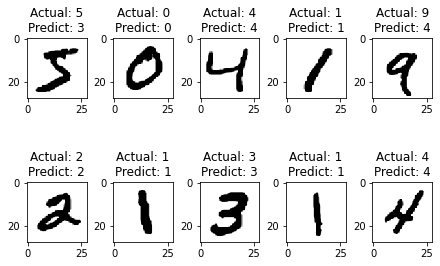

In [47]:
fig, axes = plt.subplots(2, 5, constrained_layout=True)

for i, ax in enumerate(axes.flat):
	ax.imshow(1 - train_X[i].reshape((28, 28)), cmap='gray', vmin=0, vmax=1)
	ax.set(title=f'Actual: {y[i]}\nPredict: {predict_y[i]}')